In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd


In [3]:
import src.ClassicML.DGE.pydeseq_utils as pydeseq_utils

## 0. Load and display the dataset

In [4]:
count_data_kidney_cancer = pd.read_csv('./de_gsea_data/rna_seq_data/kidney_unstr_tumor_normal.csv')


In [5]:
count_data_kidney_cancer.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6,file_id,tissue_type,case_id
0,3195,38,1122,490,201,1287,1706,2621,1785,1251,...,0,0,0,744,0,8,12,f1d244a9-f031-4286-b433-572de7ed8d42,Tumor,09c4ea05-928d-49b7-b7fb-30cff3481b14
1,6695,18,1986,645,295,969,11730,2916,1722,1153,...,0,1,0,621,0,8,9,a136ae8b-1e0d-4843-a461-ce554ad77458,Tumor,ea26d89f-2843-489b-8627-3d5ed0cabc2a
2,808,48,348,179,38,477,1024,1066,449,779,...,0,0,0,188,0,0,2,489b2714-26c8-4889-9ca9-378957da1a6c,Tumor,77d8c2cf-6b27-417b-9d43-14c95e6f9b85
3,2325,13,1403,468,178,1019,11755,3435,1226,1113,...,0,0,0,231,0,7,57,f34985d8-172b-4fae-8d06-989e7dc4dc06,Tumor,e33dff22-5bf1-4dd8-bed7-063cb555677c
4,3338,34,1396,838,267,1169,10397,3594,2755,2217,...,0,0,0,551,0,4,8,9c146666-fd40-4251-9b57-ee537addac17,Tumor,830b8de5-fd22-49d6-ad1d-c7cf619bf0ac


In [6]:
count_data_kidney_cancer.shape

(1200, 60663)

## 0.2. Keep only unique case_ids for DGE analysis

In [7]:
unique_data_by_case_id =  count_data_kidney_cancer.drop_duplicates(['case_id']).reset_index(drop=True)
kidney_cancer_count_data = unique_data_by_case_id.iloc[:, :60660].T
counts = kidney_cancer_count_data.copy().reset_index()
counts = counts.set_index('index')
counts

,0,1,2,3,4,5,6,7,8,9,...,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062
index,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3195,6695,808,2325,3338,3091,4826,2684,1497,2815,...,9941,2166,1553,12499,4660,11654,3305,1912,1751,5824
TNMD,38,18,48,13,34,19,26,1,8,4,...,14,75,6,10,11,42,5,9,15,23
DPM1,1122,1986,348,1403,1396,1743,1519,1385,1191,2148,...,1773,1266,3368,2515,2687,1897,1020,1527,1453,2153
SCYL3,490,645,179,468,838,1423,842,444,436,756,...,1160,207,495,613,554,1101,493,388,263,474
C1orf112,201,295,38,178,267,435,279,77,173,454,...,147,82,94,128,411,157,51,56,79,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC008763.4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,1
AL592295.6,744,621,188,231,551,624,682,238,196,280,...,312,301,921,520,522,683,247,280,370,417
AC006486.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
unique_data_by_case_id

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6,file_id,tissue_type,case_id
0,3195,38,1122,490,201,1287,1706,2621,1785,1251,...,0,0,0,744,0,8,12,f1d244a9-f031-4286-b433-572de7ed8d42,Tumor,09c4ea05-928d-49b7-b7fb-30cff3481b14
1,6695,18,1986,645,295,969,11730,2916,1722,1153,...,0,1,0,621,0,8,9,a136ae8b-1e0d-4843-a461-ce554ad77458,Tumor,ea26d89f-2843-489b-8627-3d5ed0cabc2a
2,808,48,348,179,38,477,1024,1066,449,779,...,0,0,0,188,0,0,2,489b2714-26c8-4889-9ca9-378957da1a6c,Tumor,77d8c2cf-6b27-417b-9d43-14c95e6f9b85
3,2325,13,1403,468,178,1019,11755,3435,1226,1113,...,0,0,0,231,0,7,57,f34985d8-172b-4fae-8d06-989e7dc4dc06,Tumor,e33dff22-5bf1-4dd8-bed7-063cb555677c
4,3338,34,1396,838,267,1169,10397,3594,2755,2217,...,0,0,0,551,0,4,8,9c146666-fd40-4251-9b57-ee537addac17,Tumor,830b8de5-fd22-49d6-ad1d-c7cf619bf0ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,11654,42,1897,1101,157,1211,2983,2956,1257,3423,...,0,0,1,683,0,8,8,0c084571-72e0-4592-974e-a00d95e3a6a5,Normal,b08dfba8-6afb-4217-9259-72be6f1f3363
1059,3305,5,1020,493,51,221,135,1294,2059,640,...,0,0,0,247,0,9,46,7b5bdde2-cbc5-4f11-9dff-3217eb69734c,Tumor,0697436f-e487-45db-b0bc-ad9246f70196
1060,1912,9,1527,388,56,180,307,1096,1323,544,...,0,0,0,280,0,13,6,a007ff12-ba3c-47b8-9acc-121816a85594,Tumor,af1111af-9384-4e37-9b16-227d38007ebd
1061,1751,15,1453,263,79,223,162,1772,1509,735,...,0,0,0,370,0,11,19,f13d1071-7019-4004-ac83-39b11ccea06e,Tumor,39034b58-1fe1-4cae-ad3e-3ee291f1b4d0


## 0.3. Run Differential Gene Expression

In [9]:
unique_data_by_case_id['tissue_type'].value_counts()

tissue_type
Tumor     990
Normal     73
Name: count, dtype: int64

In [10]:
counts = counts.T
counts = pd.concat( [unique_data_by_case_id[['case_id']], counts],axis=1)

In [11]:
# counts.rename(columns={'Case ID':'Geneid'}, inplace=True)
counts.set_index('case_id', inplace=True)
counts.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
case_id,,,,,,,,,,,,,,,,,,,,,
09c4ea05-928d-49b7-b7fb-30cff3481b14,3195,38,1122,490,201,1287,1706,2621,1785,1251,...,0,0,12,0,0,0,744,0,8,12
ea26d89f-2843-489b-8627-3d5ed0cabc2a,6695,18,1986,645,295,969,11730,2916,1722,1153,...,0,0,16,0,1,0,621,0,8,9
77d8c2cf-6b27-417b-9d43-14c95e6f9b85,808,48,348,179,38,477,1024,1066,449,779,...,0,0,10,0,0,0,188,0,0,2
e33dff22-5bf1-4dd8-bed7-063cb555677c,2325,13,1403,468,178,1019,11755,3435,1226,1113,...,0,0,28,0,0,0,231,0,7,57
830b8de5-fd22-49d6-ad1d-c7cf619bf0ac,3338,34,1396,838,267,1169,10397,3594,2755,2217,...,0,0,12,0,0,0,551,0,4,8


In [12]:
metadata = unique_data_by_case_id[['case_id', 'tissue_type']]
metadata.columns = ['Sample', 'Condition']
metadata = metadata.set_index(keys='Sample') 


In [13]:
pydeseq_obj = pydeseq_utils.PyDeSeqWrapper(count_matrix=counts, metadata=metadata, design_factors='Condition', groups = {'group1':'Tumor', 'group2':'Normal'})
design_factor = 'Condition'
result = pydeseq_obj.run_deseq(design_factor=design_factor, group1 = 'Tumor', group2 = 'Normal')

28/08//2024 04:38:1724843330 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2 for groups: {'group1': 'Tumor', 'group2': 'Normal'}
28/08//2024 04:38:1724843330 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2  factor analysis with design factor: C and o
28/08//2024 04:38:1724843330 PM - INFO - PyDeSeqWrapper.run_deseq: Statistical analysis of Tumor vs Normal in {'group1': 'Tumor', 'group2': 'Normal'}


Fitting size factors...
... done in 1.03 seconds.

Fitting dispersions...
... done in 14.91 seconds.

Fitting dispersion trend curve...
... done in 4.05 seconds.

Fitting MAP dispersions...
... done in 15.40 seconds.

Fitting LFCs...
... done in 50.07 seconds.

Refitting 9069 outliers.

Fitting size factors...
... done in 0.11 seconds.

Fitting dispersions...
... done in 10.37 seconds.

Fitting MAP dispersions...
... done in 7.76 seconds.

Fitting LFCs...
... done in 20.76 seconds.



In [14]:
result.summary()

Running Wald tests...
... done in 52.29 seconds.



Log2 fold change & Wald test p-value: Condition Tumor vs Normal


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,4184.804777,-0.782037,0.098060,-7.975103,1.522542e-15,1.276386e-14
TNMD,65.882420,-1.105029,0.289324,-3.819341,1.338089e-04,3.072090e-04
DPM1,1686.025155,0.169313,0.066890,2.531212,1.136691e-02,1.874972e-02
SCYL3,625.620453,-0.296047,0.056611,-5.229506,1.699639e-07,5.845573e-07
C1orf112,288.317462,1.209500,0.132271,9.144072,6.014388e-20,7.526282e-19
...,...,...,...,...,...,...
AC008763.4,0.211038,0.432384,0.583801,0.740636,4.589140e-01,5.119062e-01
AL592295.6,511.624383,-0.475900,0.070991,-6.703641,2.032897e-11,1.116746e-10
AC006486.3,0.000000,NaN,NaN,NaN,NaN,NaN
AL391628.1,6.613852,0.045363,0.144801,0.313277,7.540703e-01,7.836336e-01


## 0.4. Visualizations

In [15]:
import numpy as np
# gene_annotation = pd.read_csv('./Transcriptomics/data/gene_annotation/gene_id_to_gene_name_mapping.csv')

results_df = result.results_df
results_df_filtered = results_df.dropna()
results_df_filtered = results_df_filtered.reset_index()
results_df_filtered['nlog10'] = -1*np.log10(results_df_filtered.padj)

# results_df_filtered = results_df_filtered.merge(gene_annotation, left_on='index', right_on='gene_id')
# results_df_filtered  = results_df_filtered .replace([np.inf, -np.inf], 300)
# results_df_filtered.sort_values('padj', ascending=False)

In [16]:
results_df_filtered.sort_values('padj', ascending=False)

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10
10082,AGAP1,3488.839466,0.000008,0.083813,0.000101,9.999194e-01,9.999194e-01,0.000035
32558,AC093809.1,32.756004,-0.000170,0.256022,-0.000665,9.994698e-01,9.994906e-01,0.000221
16845,ILRUN,8310.931948,-0.000055,0.083176,-0.000667,9.994679e-01,9.994906e-01,0.000221
34559,MTND6P3,18.090137,0.000310,0.269941,0.001148,9.990838e-01,9.991461e-01,0.000371
25091,NAMPTP1,187.555887,0.000218,0.183096,0.001189,9.990511e-01,9.991342e-01,0.000376
...,...,...,...,...,...,...,...,...
6191,APOC1,3003.140898,5.375115,0.219898,24.443725,5.868193e-132,5.642619e-128,127.248519
8965,CDKN2A,359.137236,4.987695,0.196529,25.378927,4.309682e-142,5.180022e-138,137.285668
2895,CALB1,1573.215470,-7.668923,0.274035,-27.985189,2.460821e-172,3.943712e-168,167.404095
20388,AC019080.1,239.375856,-3.503484,0.122548,-28.588679,9.290756e-180,2.233405e-175,174.651033


## 0.5. run gsea

In [17]:
!pip install gseapy

In [18]:
df = results_df_filtered.copy()
df['Rank'] = -np.log10(df.padj)*df.log2FoldChange

df = df.sort_values('Rank', ascending = False).reset_index(drop = True)

df = df.rename(columns = {'index': 'Gene'})

In [19]:
df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10,Rank
0,CHRNA1,481.885796,7.798595,0.343935,22.674596,7.981120e-114,1.918581e-110,109.717020,855.638621
1,COL2A1,5754.267262,9.604438,0.510252,18.822932,4.899677e-79,2.379461e-76,75.623521,726.321459
2,FABP7,6419.917298,8.970645,0.463234,19.365266,1.515715e-83,9.463964e-81,80.023927,717.866258
3,NPTX2,6664.211857,6.731557,0.306446,21.966559,6.015681e-107,1.257487e-103,102.900497,692.680567
4,CDKN2A,359.137236,4.987695,0.196529,25.378927,4.309682e-142,5.180022e-138,137.285668,684.739099
...,...,...,...,...,...,...,...,...,...
48073,LINC01020,35.684634,-6.610252,0.283404,-23.324524,2.500224e-120,7.070928e-117,116.150524,-767.784209
48074,SLC12A1,11924.685821,-8.031380,0.339211,-23.676647,6.275719e-124,2.742945e-120,119.561783,-960.246106
48075,AC112243.1,31.790706,-9.431536,0.430657,-21.900329,2.579135e-106,4.959986e-103,102.304520,-964.888764
48076,MFSD4A,1955.270681,-5.087519,0.160310,-31.735586,5.019652e-221,2.413348e-216,215.617380,-1096.957601


In [171]:
ranking = df[['Gene', 'Rank']]
ranking

,Gene,Rank
0,CHRNA1,855.638621
1,COL2A1,726.321459
2,FABP7,717.866258
3,NPTX2,692.680567
4,CDKN2A,684.739099
...,...,...
48073,LINC01020,-767.784209
48074,SLC12A1,-960.246106
48075,AC112243.1,-964.888764
48076,MFSD4A,-1096.957601


In [172]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [173]:
pre_res = gp.prerank(rnk = ranking, gene_sets = 'PPI_Hub_Proteins', seed = 6, permutation_num = 1000)

In [174]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,MCM2,0.000000,0.888474,1.643524
1,PLK1,0.000000,0.833214,1.664450
2,NPM1,0.001142,0.811522,1.607309
3,TSGA14,0.001522,0.835951,1.612254
4,YDJ1,0.004187,0.807615,1.574257
...,...,...,...,...
345,TDH3,0.998700,0.295992,0.479727
346,RPL5,0.999676,0.309556,0.580658
347,TIG,1.000000,-0.717244,-1.249700
348,RVB1,1.000000,0.315263,0.505558


In [175]:
term_to_graph = out_df.iloc[0].Term
term_to_graph

'MCM2'

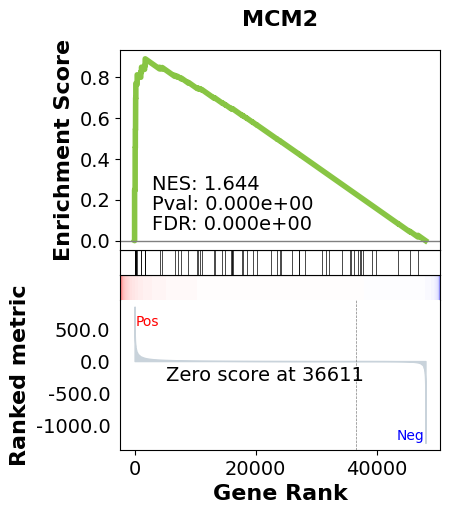

In [176]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) 

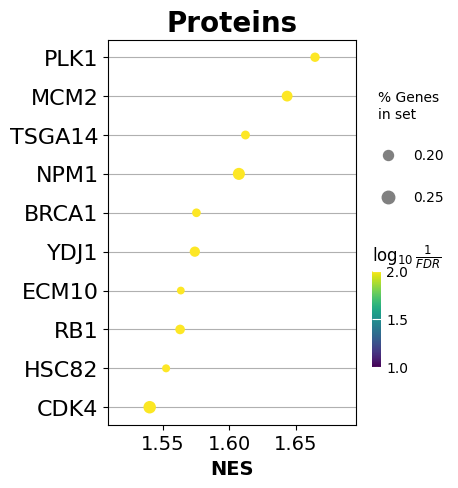

In [177]:
from gseapy import dotplot
import matplotlib.pyplot as plt
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='Proteins',
             cmap=plt.cm.viridis,
             size=6, # adjust dot size
             figsize=(4,5), cutoff=0.25, show_ring=False)

## Network Visualization

In [178]:
from gseapy import enrichment_map
import networkx as nx
# return two dataframe
nodes, edges = enrichment_map(pre_res.res2d)

In [179]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

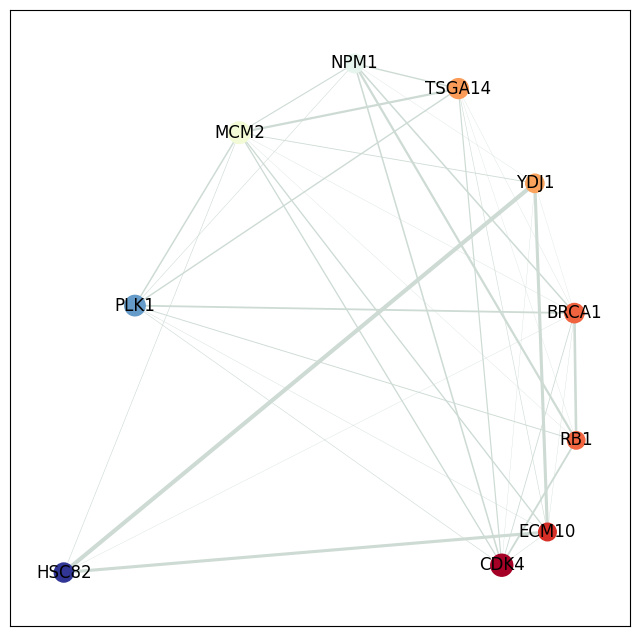

In [180]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()

## Find PPI network

In [130]:
import stringdb
genes = list(nodes['Term'])
genes = ['NPM1', 'MCM2']
string_ids = stringdb.get_string_ids(genes)
enrichment_df = stringdb.get_enrichment(string_ids.queryItem)

In [131]:
stringdb.get_network(string_ids.queryItem)

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore


In [132]:
data = stringdb.get_interaction_partners(string_ids.queryItem)

In [139]:
import seaborn as sns
data.head()

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000265056,9606.ENSP00000264156,MCM2,MCM6,9606,0.999,0.0,0.0,0.0,0.991,0.998,0.90,0.582
1,9606.ENSP00000265056,9606.ENSP00000301019,MCM2,CDT1,9606,0.999,0.0,0.0,0.0,0.911,0.919,0.50,0.819
2,9606.ENSP00000265056,9606.ENSP00000234296,MCM2,ORC2,9606,0.999,0.0,0.0,0.0,0.405,0.998,0.65,0.417
3,9606.ENSP00000265056,9606.ENSP00000401018,MCM2,GINS3,9606,0.999,0.0,0.0,0.0,0.437,0.997,0.54,0.644
4,9606.ENSP00000265056,9606.ENSP00000405726,MCM2,CDC45,9606,0.999,0.0,0.0,0.0,0.824,0.997,0.54,0.701


In [145]:
sub_data = data[data['score'] > 0.95].reset_index(drop=True)

In [146]:
stringdb.get_ppi_enrichment(string_ids.queryItem)

,number_of_nodes,number_of_edges,average_node_degree,local_clustering_coefficient,expected_number_of_edges,p_value
0,2,0,0.0,0.0,0,1.0


## Making String Network

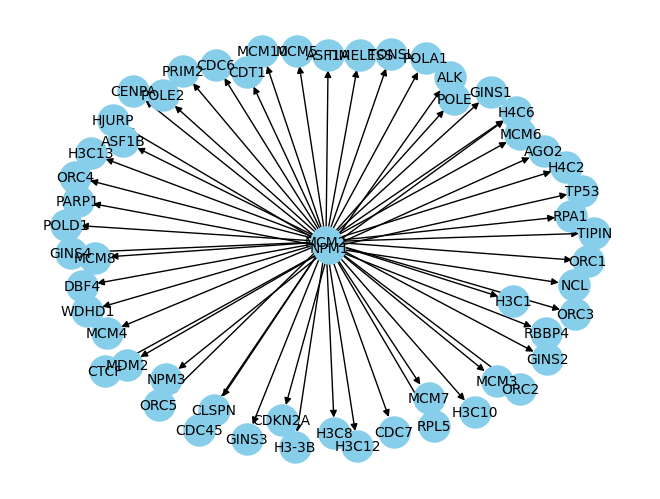

In [148]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add edges from DataFrame
for index, row in sub_data.iterrows():
    G.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='k', linewidths=1, font_size=10)

# Show the plot
plt.show()

In [ ]:
import plotly.graph_objects as go

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[],
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += (len(adjacencies[1]),)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show(